In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
# import some librarys
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn import metrics
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [4]:
# you have to change the path
dataSet = pd.read_csv('/content/drive/MyDrive/Abschlussarbeit/Datasets/Dataset/tweets_without_cleaning.csv', sep = ",")

In [5]:
# hyperparameter for keras model an tensorflow tokenizer and cross validation
vocab_size = 45000
embedding_dim = 18
max_length = 250
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

------------------------------------------------------------
!!!!!  dataset used is : tweets without cleaning  !!!!!
------------------------------------------------------------
             !!!!!  split number : 1  !!!!!
     In training: Counter({False: 8938, True: 8928})
     In testing: Counter({True: 998, False: 988})
Epoch 1/15
559/559 - 5s - loss: 0.6298 - accuracy: 0.6821 - precision: 0.7603 - recall: 0.5312 - val_loss: 0.4685 - val_accuracy: 0.8489 - val_precision: 0.8643 - val_recall: 0.8297 - 5s/epoch - 9ms/step
Epoch 2/15
559/559 - 4s - loss: 0.3497 - accuracy: 0.8795 - precision: 0.8814 - recall: 0.8769 - val_loss: 0.2971 - val_accuracy: 0.8852 - val_precision: 0.8745 - val_recall: 0.9008 - 4s/epoch - 7ms/step
Epoch 3/15
559/559 - 4s - loss: 0.2337 - accuracy: 0.9175 - precision: 0.9153 - recall: 0.9200 - val_loss: 0.2537 - val_accuracy: 0.9074 - val_precision: 0.9443 - val_recall: 0.8667 - 4s/epoch - 7ms/step
Epoch 4/15
559/559 - 4s - loss: 0.1760 - accuracy: 0.9397 - pre

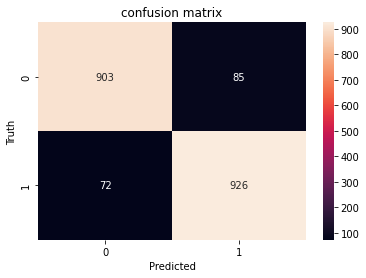

              precision    recall  f1-score   support

       False       0.93      0.91      0.92       988
        True       0.92      0.93      0.92       998

    accuracy                           0.92      1986
   macro avg       0.92      0.92      0.92      1986
weighted avg       0.92      0.92      0.92      1986

             !!!!!  split number : 2  !!!!!
     In training: Counter({False: 8942, True: 8924})
     In testing: Counter({True: 1002, False: 984})
Epoch 1/15
559/559 - 5s - loss: 0.6258 - accuracy: 0.6766 - precision: 0.6946 - recall: 0.6293 - val_loss: 0.4745 - val_accuracy: 0.8454 - val_precision: 0.7947 - val_recall: 0.9351 - 5s/epoch - 10ms/step
Epoch 2/15
559/559 - 4s - loss: 0.3480 - accuracy: 0.8773 - precision: 0.8758 - recall: 0.8789 - val_loss: 0.2886 - val_accuracy: 0.8978 - val_precision: 0.8913 - val_recall: 0.9082 - 4s/epoch - 7ms/step
Epoch 3/15
559/559 - 4s - loss: 0.2303 - accuracy: 0.9192 - precision: 0.9173 - recall: 0.9213 - val_loss: 0.2334 - 

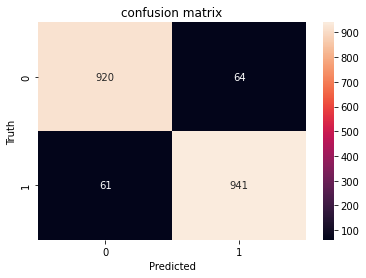

              precision    recall  f1-score   support

       False       0.94      0.93      0.94       984
        True       0.94      0.94      0.94      1002

    accuracy                           0.94      1986
   macro avg       0.94      0.94      0.94      1986
weighted avg       0.94      0.94      0.94      1986

             !!!!!  split number : 3  !!!!!
     In training: Counter({False: 8975, True: 8892})
     In testing: Counter({True: 1034, False: 951})
Epoch 1/15
559/559 - 6s - loss: 0.6378 - accuracy: 0.6781 - precision: 0.7981 - recall: 0.4729 - val_loss: 0.4785 - val_accuracy: 0.8242 - val_precision: 0.8960 - val_recall: 0.7495 - 6s/epoch - 10ms/step
Epoch 2/15
559/559 - 4s - loss: 0.3600 - accuracy: 0.8722 - precision: 0.8774 - recall: 0.8639 - val_loss: 0.2888 - val_accuracy: 0.8972 - val_precision: 0.9014 - val_recall: 0.9014 - 4s/epoch - 7ms/step
Epoch 3/15
559/559 - 4s - loss: 0.2415 - accuracy: 0.9153 - precision: 0.9137 - recall: 0.9164 - val_loss: 0.2292 - 

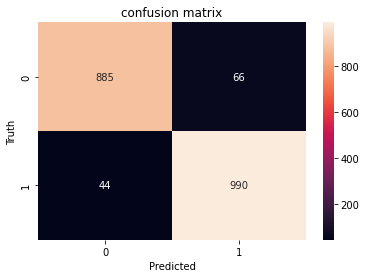

              precision    recall  f1-score   support

       False       0.95      0.93      0.94       951
        True       0.94      0.96      0.95      1034

    accuracy                           0.94      1985
   macro avg       0.95      0.94      0.94      1985
weighted avg       0.94      0.94      0.94      1985

             !!!!!  split number : 4  !!!!!
     In training: Counter({False: 8938, True: 8929})
     In testing: Counter({True: 997, False: 988})
Epoch 1/15
559/559 - 5s - loss: 0.6147 - accuracy: 0.6908 - precision: 0.7066 - recall: 0.6520 - val_loss: 0.4412 - val_accuracy: 0.8710 - val_precision: 0.8365 - val_recall: 0.9238 - 5s/epoch - 9ms/step
Epoch 2/15
559/559 - 4s - loss: 0.3327 - accuracy: 0.8818 - precision: 0.8809 - recall: 0.8829 - val_loss: 0.2872 - val_accuracy: 0.8952 - val_precision: 0.9302 - val_recall: 0.8556 - 4s/epoch - 7ms/step
Epoch 3/15
559/559 - 4s - loss: 0.2185 - accuracy: 0.9230 - precision: 0.9221 - recall: 0.9240 - val_loss: 0.2293 - va

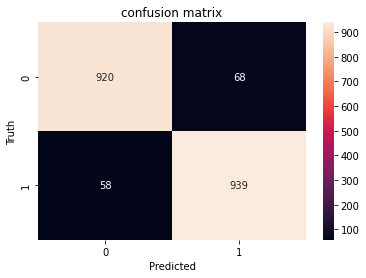

              precision    recall  f1-score   support

       False       0.94      0.93      0.94       988
        True       0.93      0.94      0.94       997

    accuracy                           0.94      1985
   macro avg       0.94      0.94      0.94      1985
weighted avg       0.94      0.94      0.94      1985

             !!!!!  split number : 5  !!!!!
     In training: Counter({False: 8958, True: 8909})
     In testing: Counter({True: 1017, False: 968})
Epoch 1/15
559/559 - 5s - loss: 0.6434 - accuracy: 0.6541 - precision: 0.7325 - recall: 0.4823 - val_loss: 0.5190 - val_accuracy: 0.8176 - val_precision: 0.8777 - val_recall: 0.7483 - 5s/epoch - 9ms/step
Epoch 2/15
559/559 - 4s - loss: 0.3775 - accuracy: 0.8752 - precision: 0.8845 - recall: 0.8623 - val_loss: 0.3288 - val_accuracy: 0.8695 - val_precision: 0.8998 - val_recall: 0.8387 - 4s/epoch - 7ms/step
Epoch 3/15
559/559 - 4s - loss: 0.2474 - accuracy: 0.9155 - precision: 0.9126 - recall: 0.9186 - val_loss: 0.2642 - v

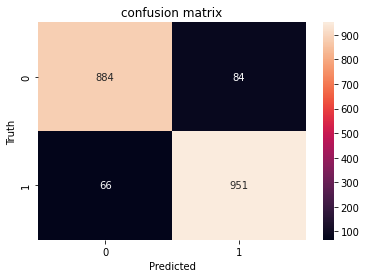

              precision    recall  f1-score   support

       False       0.93      0.91      0.92       968
        True       0.92      0.94      0.93      1017

    accuracy                           0.92      1985
   macro avg       0.92      0.92      0.92      1985
weighted avg       0.92      0.92      0.92      1985

             !!!!!  split number : 6  !!!!!
     In training: Counter({True: 8962, False: 8905})
     In testing: Counter({False: 1021, True: 964})
Epoch 1/15
559/559 - 5s - loss: 0.6318 - accuracy: 0.6777 - precision: 0.7642 - recall: 0.5171 - val_loss: 0.4632 - val_accuracy: 0.8625 - val_precision: 0.8319 - val_recall: 0.8983 - 5s/epoch - 10ms/step
Epoch 2/15
559/559 - 4s - loss: 0.3507 - accuracy: 0.8785 - precision: 0.8787 - recall: 0.8792 - val_loss: 0.2942 - val_accuracy: 0.8882 - val_precision: 0.8467 - val_recall: 0.9398 - 4s/epoch - 7ms/step
Epoch 3/15
559/559 - 4s - loss: 0.2362 - accuracy: 0.9162 - precision: 0.9159 - recall: 0.9172 - val_loss: 0.2263 - 

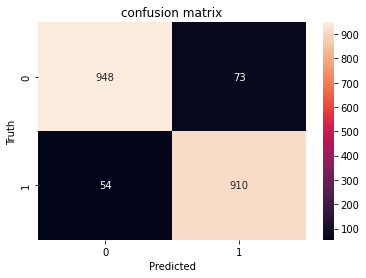

              precision    recall  f1-score   support

       False       0.95      0.93      0.94      1021
        True       0.93      0.94      0.93       964

    accuracy                           0.94      1985
   macro avg       0.94      0.94      0.94      1985
weighted avg       0.94      0.94      0.94      1985

             !!!!!  split number : 7  !!!!!
     In training: Counter({True: 8984, False: 8883})
     In testing: Counter({False: 1043, True: 942})
Epoch 1/15
559/559 - 5s - loss: 0.6242 - accuracy: 0.6921 - precision: 0.7123 - recall: 0.6503 - val_loss: 0.4694 - val_accuracy: 0.8519 - val_precision: 0.8506 - val_recall: 0.8344 - 5s/epoch - 10ms/step
Epoch 2/15
559/559 - 4s - loss: 0.3559 - accuracy: 0.8781 - precision: 0.8806 - recall: 0.8763 - val_loss: 0.3026 - val_accuracy: 0.8897 - val_precision: 0.8793 - val_recall: 0.8896 - 4s/epoch - 7ms/step
Epoch 3/15
559/559 - 4s - loss: 0.2378 - accuracy: 0.9178 - precision: 0.9169 - recall: 0.9199 - val_loss: 0.2477 - 

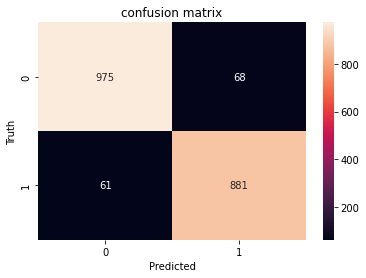

              precision    recall  f1-score   support

       False       0.94      0.93      0.94      1043
        True       0.93      0.94      0.93       942

    accuracy                           0.94      1985
   macro avg       0.93      0.94      0.93      1985
weighted avg       0.94      0.94      0.94      1985

             !!!!!  split number : 8  !!!!!
     In training: Counter({True: 8947, False: 8920})
     In testing: Counter({False: 1006, True: 979})
Epoch 1/15
559/559 - 5s - loss: 0.6159 - accuracy: 0.7096 - precision: 0.7549 - recall: 0.6221 - val_loss: 0.4476 - val_accuracy: 0.8574 - val_precision: 0.8005 - val_recall: 0.9469 - 5s/epoch - 9ms/step
Epoch 2/15
559/559 - 4s - loss: 0.3337 - accuracy: 0.8796 - precision: 0.8800 - recall: 0.8795 - val_loss: 0.2733 - val_accuracy: 0.8987 - val_precision: 0.8712 - val_recall: 0.9326 - 4s/epoch - 7ms/step
Epoch 3/15
559/559 - 4s - loss: 0.2236 - accuracy: 0.9208 - precision: 0.9199 - recall: 0.9221 - val_loss: 0.2168 - v

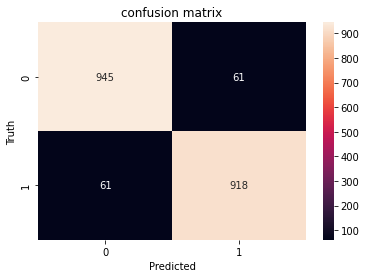

              precision    recall  f1-score   support

       False       0.94      0.94      0.94      1006
        True       0.94      0.94      0.94       979

    accuracy                           0.94      1985
   macro avg       0.94      0.94      0.94      1985
weighted avg       0.94      0.94      0.94      1985

             !!!!!  split number : 9  !!!!!
     In training: Counter({False: 8943, True: 8924})
     In testing: Counter({True: 1002, False: 983})
Epoch 1/15
559/559 - 5s - loss: 0.6370 - accuracy: 0.6659 - precision: 0.7353 - recall: 0.5174 - val_loss: 0.4789 - val_accuracy: 0.8433 - val_precision: 0.8801 - val_recall: 0.7984 - 5s/epoch - 9ms/step
Epoch 2/15
559/559 - 4s - loss: 0.3551 - accuracy: 0.8761 - precision: 0.8786 - recall: 0.8725 - val_loss: 0.3027 - val_accuracy: 0.8882 - val_precision: 0.8591 - val_recall: 0.9311 - 4s/epoch - 7ms/step
Epoch 3/15
559/559 - 4s - loss: 0.2338 - accuracy: 0.9168 - precision: 0.9134 - recall: 0.9207 - val_loss: 0.2471 - v

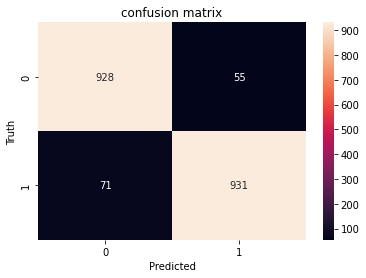

              precision    recall  f1-score   support

       False       0.93      0.94      0.94       983
        True       0.94      0.93      0.94      1002

    accuracy                           0.94      1985
   macro avg       0.94      0.94      0.94      1985
weighted avg       0.94      0.94      0.94      1985

             !!!!!  split number : 10  !!!!!
     In training: Counter({True: 8935, False: 8932})
     In testing: Counter({False: 994, True: 991})
Epoch 1/15
559/559 - 5s - loss: 0.6310 - accuracy: 0.6708 - precision: 0.6671 - recall: 0.6820 - val_loss: 0.4624 - val_accuracy: 0.8327 - val_precision: 0.8749 - val_recall: 0.7760 - 5s/epoch - 10ms/step
Epoch 2/15
559/559 - 4s - loss: 0.3514 - accuracy: 0.8762 - precision: 0.8796 - recall: 0.8717 - val_loss: 0.2841 - val_accuracy: 0.8932 - val_precision: 0.9184 - val_recall: 0.8628 - 4s/epoch - 7ms/step
Epoch 3/15
559/559 - 4s - loss: 0.2349 - accuracy: 0.9172 - precision: 0.9171 - recall: 0.9174 - val_loss: 0.2175 - 

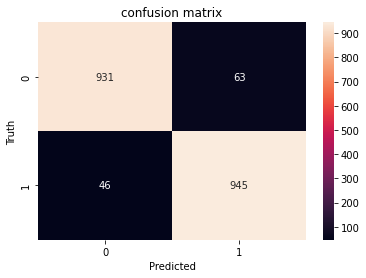

              precision    recall  f1-score   support

       False       0.95      0.94      0.94       994
        True       0.94      0.95      0.95       991

    accuracy                           0.95      1985
   macro avg       0.95      0.95      0.95      1985
weighted avg       0.95      0.95      0.95      1985

mean accuracy for this experiment is 0.94
mean recall for this experiment is 0.94
mean precision for this experiment is 0.93
mean f1_score for this experiment is 0.94


In [6]:
dataSet_text = dataSet['text']
dataSet_label = dataSet['label']
accuracy  = 0
recall    = 0
f1_score  = 0
precision = 0
print('------------------------------------------------------------')
print('!!!!!  dataset used is : tweets without cleaning  !!!!!')
print('------------------------------------------------------------')
#cross validation counter
split = 1
kfold = KFold(n_splits=10, shuffle=True)
#cross validation loop
for train, test in kfold.split(dataSet_text, dataSet_label):
  #convert the vectors to np array
  training_labels = np.array(dataSet_label[train])
  testing_labels  = np.array(dataSet_label[test])
  training_padded = np.array(dataSet_text[train])
  testing_padded  = np.array(dataSet_text[test])
  
  #some output
  print('             !!!!!  split number : '+ str(split) + '  !!!!!')
  print('     ' + f'In training: {Counter(training_labels)}')
  print('     ' + f'In testing: {Counter(testing_labels)}')


########################### SVM model ###########################

  #creat SVM model 
  svm_model = Pipeline([('tfidf',TfidfVectorizer()), ('clf', SVC(probability=True)),])
  #fit the model
  svm_model.fit(training_padded, training_labels)
  #get the predicted lable
  svm_lable_predicted = svm_model.predict(testing_padded)

########################### end of SVM model ###########################


########################### Naive-Bayes model ###########################

  #creat Naive-Bayes model
  Naive_Bayes_model = make_pipeline(TfidfVectorizer(), MultinomialNB())
  #fit the model
  Naive_Bayes_model.fit(training_padded, training_labels)
  #get the predicted lable  
  Naive_Bayes_lable_predicted = Naive_Bayes_model.predict(testing_padded)

########################### end of Naive-Bayes model ###########################


########################### Tensorflow tokenizer and Keras model ###########################

  #create the tokenizer and fit the tokenizer dictionary
  tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
  tokenizer.fit_on_texts(dataSet_text[train])
  #convert texts to sequences
  training_sequences = tokenizer.texts_to_sequences(dataSet_text[train])
  testing_sequences = tokenizer.texts_to_sequences(dataSet_text[test])
  #make the sequences in the same length
  training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)    
  testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
  
  #convert the vectors to np array
  training_padded = np.array(training_padded)
  testing_padded = np.array(testing_padded)
  
  #create the keras model with 4 layers
  keras_model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(24, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  #create the metrics array
  metrics_array = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
  ]
  #compile the model
  keras_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=metrics_array)

  #model training with 15 epochs
  history = keras_model.fit(training_padded, training_labels, epochs=15, validation_data=(testing_padded, testing_labels), verbose=2)

  # testing the model
  keras_lable_predicted = keras_model.predict(testing_padded)
  keras_lable_predicted = keras_lable_predicted.flatten()
  keras_lable_predicted = np.where(keras_lable_predicted > 0.5, True, False)

########################### end of Tensorflow tokenizer and Keras model ###########################


  # create final predicted result
  lable_predicted = []
  for i in range (0, len(testing_labels)):
    if  (keras_lable_predicted[i] and  Naive_Bayes_lable_predicted[i]) or ( keras_lable_predicted[i] and svm_lable_predicted[i]) or ( Naive_Bayes_lable_predicted[i] and svm_lable_predicted[i]):
      lable_predicted.append(True)
    else:
      lable_predicted.append(False)

  #create and show the confusion matrix
  cm = metrics.confusion_matrix(testing_labels, lable_predicted)
  sn.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Truth')
  plt.title('confusion matrix')
  plt.show()

  #show the classification report 
  print(metrics.classification_report(testing_labels, lable_predicted))

  #add the new metrics result from the new cross val. to the old  metrics result from the old cross val.
  accuracy  = accuracy + metrics.accuracy_score(testing_labels, lable_predicted)
  recall    = recall + metrics.recall_score(testing_labels, lable_predicted)
  f1_score  = f1_score + metrics.f1_score(testing_labels, lable_predicted)
  precision = precision + metrics.precision_score(testing_labels, lable_predicted)
  #indexing
  split = split + 1

#compute the mean of the using metrics in the cross val.
accuracy  = accuracy / 10
recall    = recall / 10
f1_score  = f1_score / 10
precision = precision / 10
#some output
print("mean accuracy for this experiment is " + str(round(accuracy, 2)))
print("mean recall for this experiment is " + str(round(recall, 2)))
print("mean precision for this experiment is " + str(round(precision, 2)))
print("mean f1_score for this experiment is " + str(round(f1_score, 2)))
